<img src="https://assets-prod.zee.com/wp-content/uploads/2019/10/ZEE-Corporate-Logo1.jpg" width="1000" height="500">

## About Zee 📺

ZEE5 is an Indian subscription video on demand and over-the-top streaming service, owned by Zee Entertainment Enterprises. It was launched in India on 14 February 2018 with content in 12 languages. The ZEE5 mobile app is available on Web, Android, iOS, Smart TVs, among other devices. ZEE5 claimed 56 million monthly active users in December 2019.

## Business Problem 💡

The primary objective is to develop a robust Recommender System that personalizes movie recommendations for users of the Zee OTT platform. The system aims to enhance user experience by suggesting movies based on user ratings, viewing history, and similarities with other users.

- - -

## Importing Required Libraries 🤝

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

- - - -
## Read Dataset 🔍

### Movie Dataset

In [2]:
movies_df = pd.read_csv('./data/zee-movies.dat', delimiter='::', encoding='ISO-8859-1')
movies_df.head()

,Movie ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
print(f"Shape of the dataset: {movies_df.shape}")   
movies_df.info()

Shape of the dataset: (3883, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie ID  3883 non-null   int64 
 1   Title     3883 non-null   object
 2   Genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [4]:
movies_df.isna().sum()

Movie ID    0
Title       0
Genres      0
dtype: int64

In [5]:
movies_df['Genres'] = movies_df['Genres'].str.split('|')
movies_df['Release_Year'] = movies_df['Title'].str.extract(r'\((\d{4})\)')
movies_df.head()

,Movie ID,Title,Genres,Release_Year
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",1995
4,5,Father of the Bride Part II (1995),[Comedy],1995


In [6]:
print(f"No. of Movie in the given dataset: {movies_df['Title'].nunique()}")
print(f"No. of Duplicate Movie in the given dataset: {movies_df['Title'].duplicated().sum()}")
print(f"No. of Unique Genres in the given dataset: {movies_df['Genres'].explode().nunique()}")
print(f"Earliest Movie in the dataset: {movies_df['Release_Year'].min()}")
print(f"Latest Movie in the dataset: {movies_df['Release_Year'].max()}")

No. of Movie in the given dataset: 3883
No. of Duplicate Movie in the given dataset: 0
No. of Unique Genres in the given dataset: 18
Earliest Movie in the dataset: 1919
Latest Movie in the dataset: 2000


### User Dataset

In [7]:
users_df = pd.read_csv('./data/zee-users.dat', delimiter='::', encoding='ISO-8859-1')
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
print(f"Shape of the dataset: {users_df.shape}")
users_df.info()

Shape of the dataset: (6040, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [9]:
users_df.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [10]:
print(f"No. of Users in the given dataset: {users_df['UserID'].nunique()}")
print(f"No. of Duplicate Users in the given dataset: {users_df['UserID'].duplicated().sum()}")

No. of Users in the given dataset: 6040
No. of Duplicate Users in the given dataset: 0


### Rating Dataset

In [11]:
ratings_df = pd.read_csv('./data/zee-ratings.dat', delimiter='::', encoding='ISO-8859-1')
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [12]:
print(f"Shape of the dataset: {ratings_df.shape}")
ratings_df.info()

Shape of the dataset: (1000209, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [13]:
print(f"No. of Unique Movies rated in the given dataset: {ratings_df['MovieID'].nunique()}")
print(f"No. of Duplicate rating in the given dataset: {ratings_df.duplicated().sum()}")

No. of Unique Movies rated in the given dataset: 3706
No. of Duplicate rating in the given dataset: 0


### Observations 🧐

#### Movie Dataset:
* No. of Movie in the given dataset: 3883
* No. of Duplicate Movie in the given dataset: 0
* No. of Unique Genres in the given dataset: 18
* Earliest Movie in the dataset: 1919
* Latest Movie in the dataset: 2000

#### User Dataset: 
* No. of Users in the given dataset: 6040
* No. of Duplicate Users in the given dataset: 0

#### Rating Dataset:
* Shape of the dataset: (1000209, 4)
* No. of Unique Movies rated in the given dataset: 3706
* No. of Duplicate rating in the given dataset: 0

- - - 

## Exporatory Data Analysis 📈

### Movie Dataset

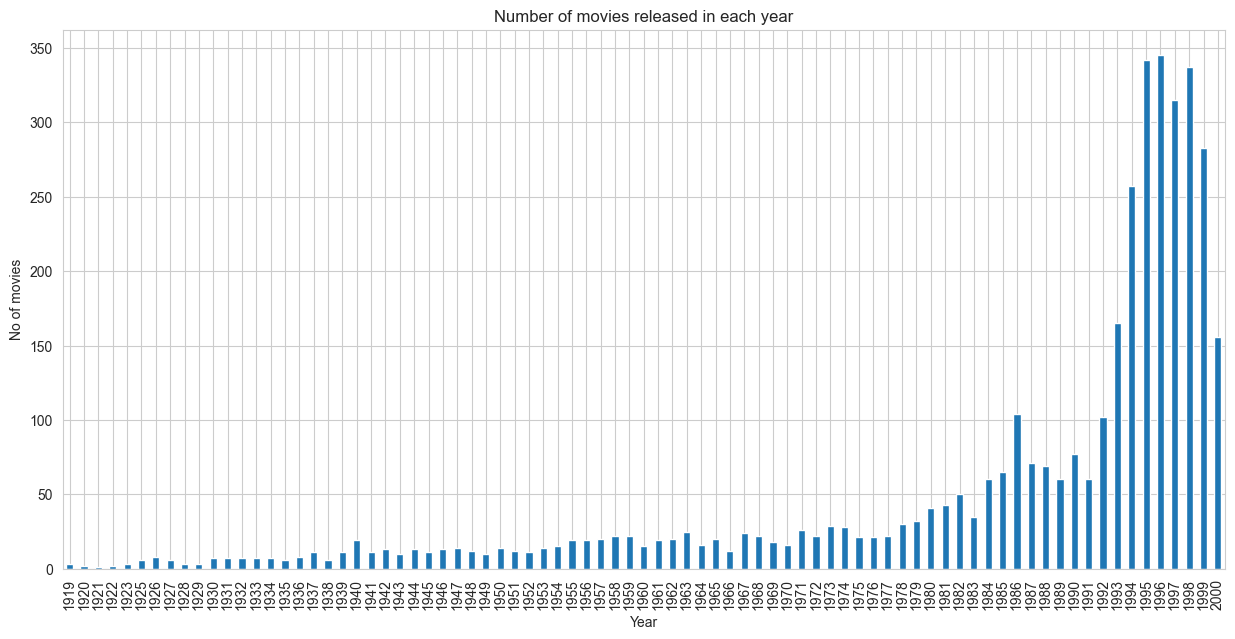

In [14]:
# No of movies released in each year
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))

movies_df.groupby('Release_Year').size().plot(kind='bar')
plt.title('Number of movies released in each year')
plt.ylabel('No of movies')
plt.xlabel('Year')
plt.show()

In [15]:
movies_df['Release_Decade'] = movies_df['Release_Year'].apply(lambda x: str(x)[2:-1] + "0's")
movies_df.head()

,Movie ID,Title,Genres,Release_Year,Release_Decade
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,90's
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",1995,90's
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,90's
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",1995,90's
4,5,Father of the Bride Part II (1995),[Comedy],1995,90's


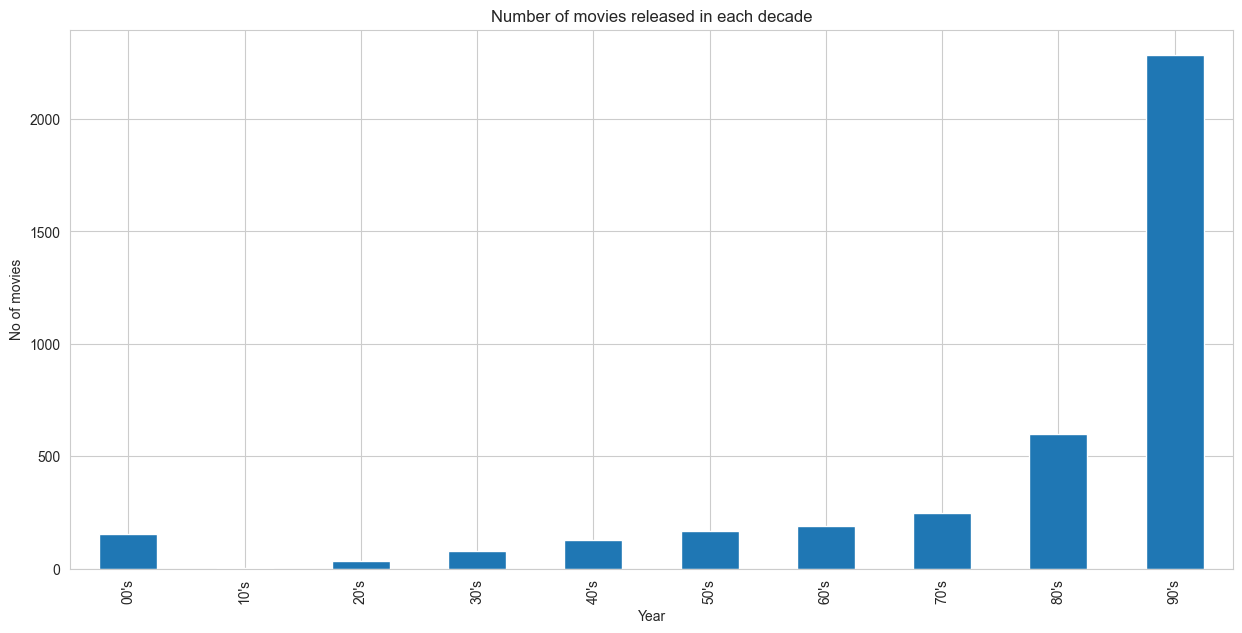

In [16]:
# No of movies released in each decade
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))

movies_df.groupby('Release_Decade').size().plot(kind='bar')
plt.title('Number of movies released in each decade')
plt.ylabel('No of movies')
plt.xlabel('Year')
plt.show()


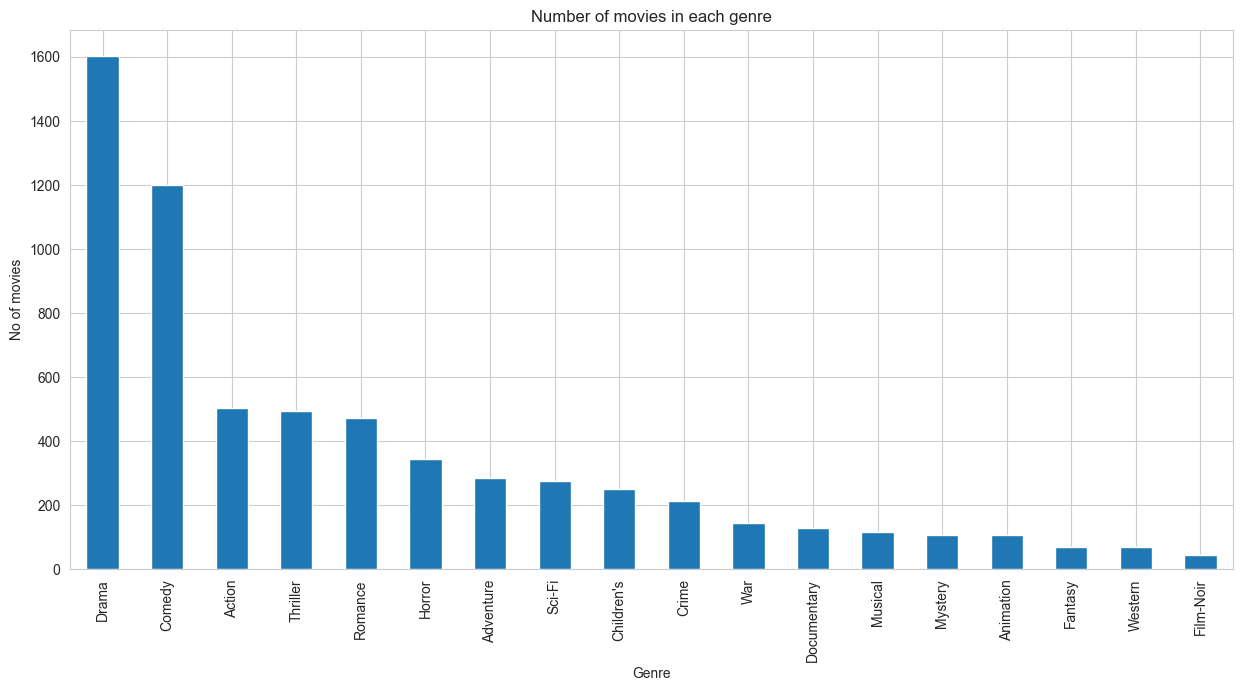

In [17]:
# No of movies in each genre
plt.figure(figsize=(15, 7))
genre_count = movies_df['Genres'].explode().value_counts()
genre_count.plot(kind='bar')
plt.title('Number of movies in each genre')
plt.ylabel('No of movies')
plt.xlabel('Genre')
plt.show()

In [18]:
# create a binary matrix for genres of each movie
genre_matrix = pd.get_dummies(movies_df['Genres'].explode()).groupby(level=0).sum()
genre_matrix.head()

# merge the genre matrix with the movies dataframe
movies_df = pd.concat([movies_df, genre_matrix], axis=1)
movies_df.head()

,Movie ID,Title,Genres,Release_Year,Release_Decade,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1995,90's,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",1995,90's,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995,90's,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",1995,90's,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],1995,90's,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Observations 🧐:
* The number of movies released each year has shown a notable increase starting from 1992.
* The 1990s saw the highest number of movie releases compared to other decades.
* Drama is the most popular movie genre, with Comedy, Action, Thriller, and Romance following in popularity.

- - - 

### User Dataset

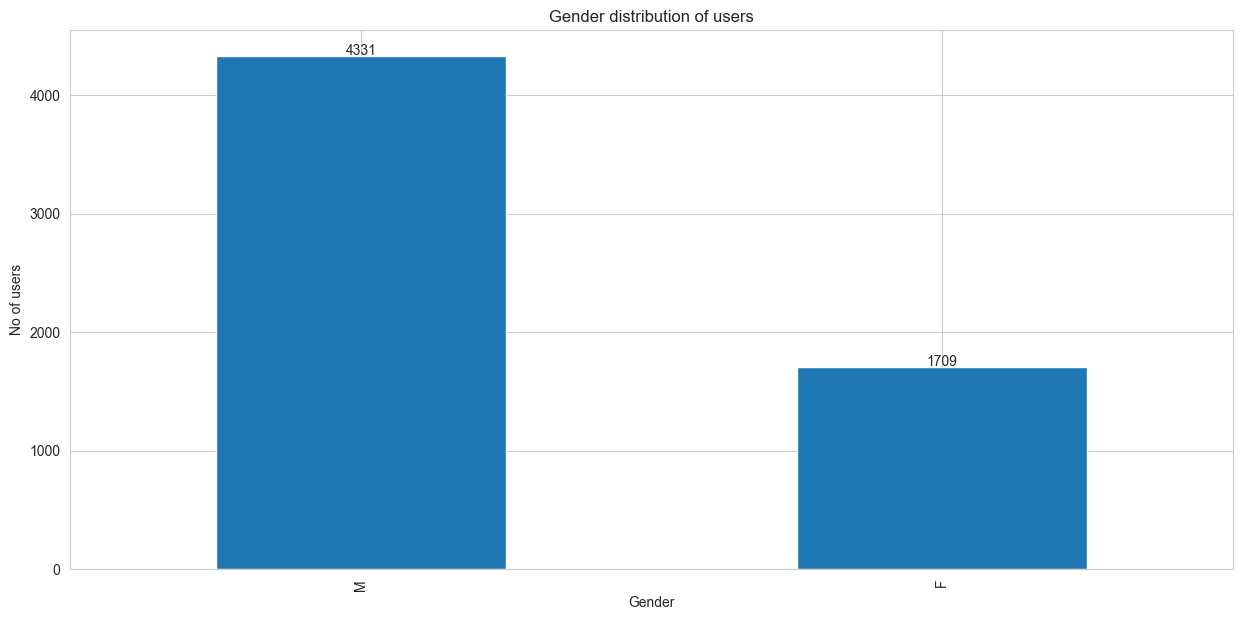

In [19]:
# Gender distribution of users
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
users_df['Gender'].value_counts().plot(kind='bar')
for i, v in enumerate(users_df['Gender'].value_counts()):
    plt.text(i, v + 10, str(v), ha='center')
plt.title('Gender distribution of users')
plt.ylabel('No of users')
plt.xlabel('Gender')
plt.show()

In [20]:
le = LabelEncoder()

users_df['Gender'] = le.fit_transform(users_df['Gender'])
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455


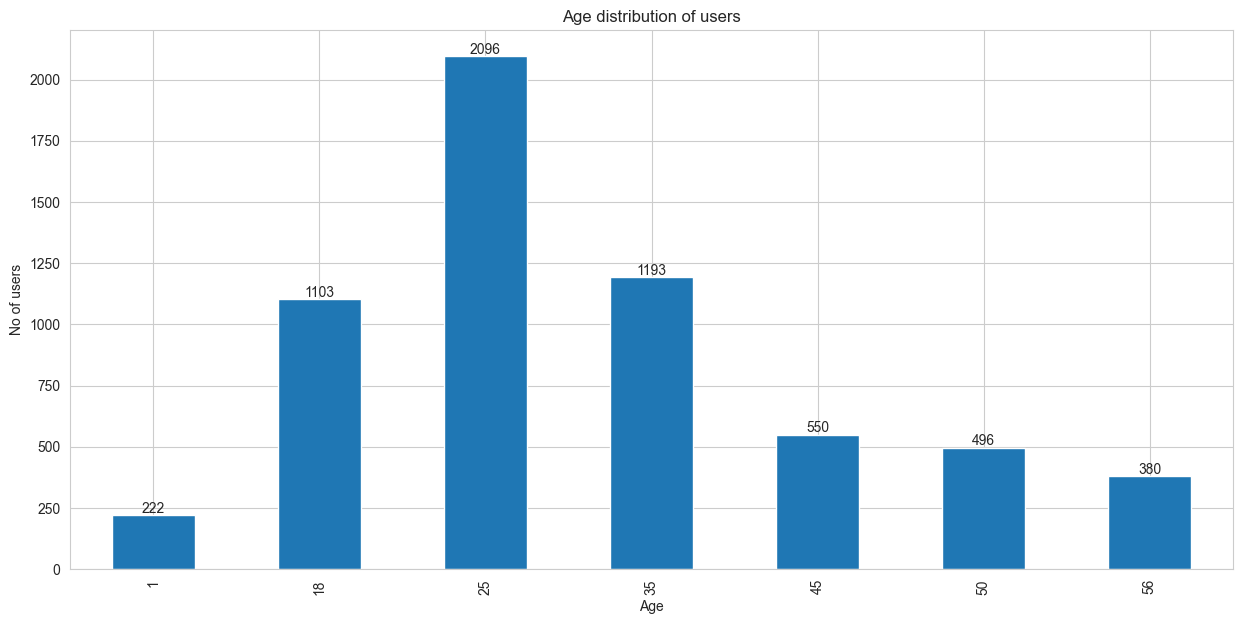

In [21]:
# Age distribution of users 
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
users_df['Age'].value_counts().sort_index().plot(kind='bar')
for i, v in enumerate(users_df['Age'].value_counts().sort_index()):
    plt.text(i, v + 10, str(v), ha='center')
plt.title('Age distribution of users')
plt.ylabel('No of users')
plt.xlabel('Age')
plt.show()

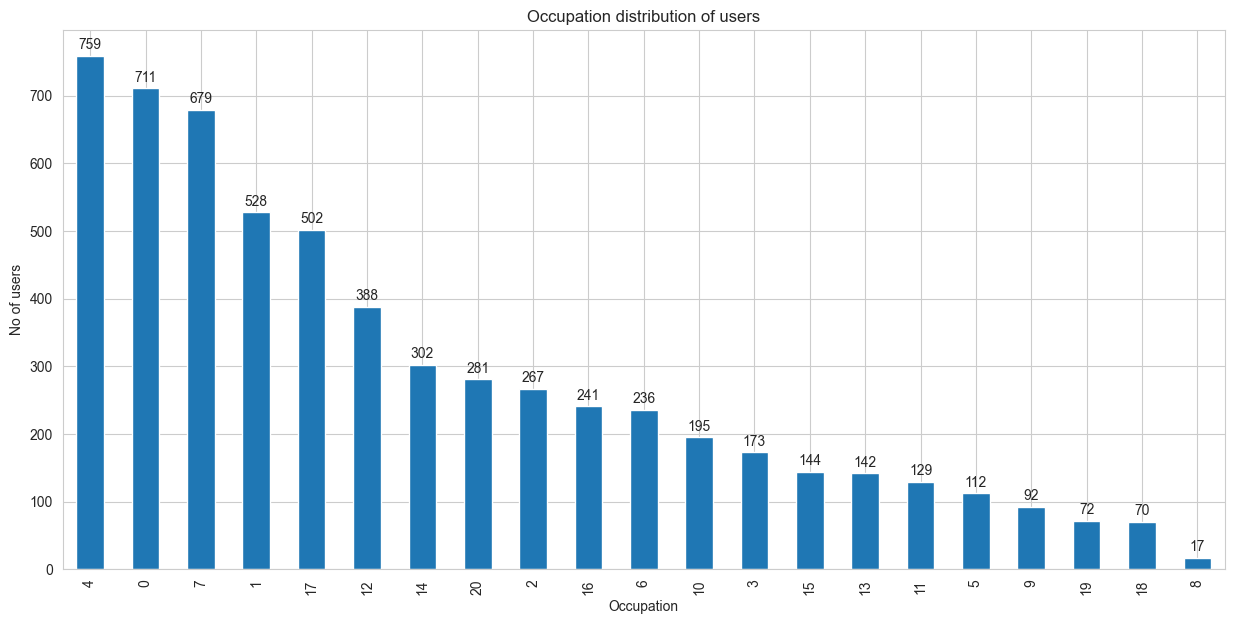

In [22]:
# Occupation distribution of users
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
users_df['Occupation'].value_counts().plot(kind='bar')
for i, v in enumerate(users_df['Occupation'].value_counts()):
    plt.text(i, v + 10, str(v), ha='center')
plt.title('Occupation distribution of users')
plt.ylabel('No of users')
plt.xlabel('Occupation')
plt.show()

### Observations 🧐:
* Male users constitute 71% of the user base.
* The majority of users fall within the age range of 25-34, followed by those aged 35-44 and 18-24.
* Most users in our dataset have a college or graduate education, followed by those with unspecified or other, and those in executive or managerial positions.

- - -

### Rating Dataset

In [23]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [24]:
ratings_df['Timestamp'] = pd.to_datetime(ratings_df['Timestamp'], unit='s')
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,2000-12-31 22:12:40
1,1,661,3,2000-12-31 22:35:09
2,1,914,3,2000-12-31 22:32:48
3,1,3408,4,2000-12-31 22:04:35
4,1,2355,5,2001-01-06 23:38:11
...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41
1000205,6040,1094,5,2000-04-25 23:21:27
1000206,6040,562,5,2000-04-25 23:19:06
1000207,6040,1096,4,2000-04-26 02:20:48


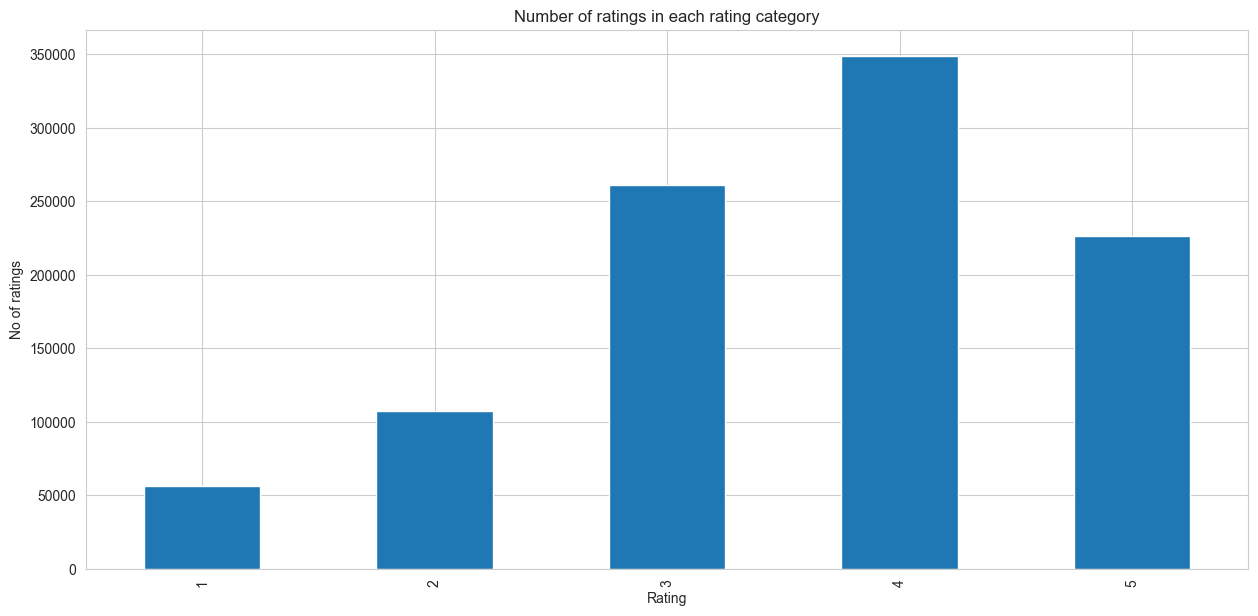

In [25]:
ratings_df.groupby('Rating').size()
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
ratings_df.groupby('Rating').size().plot(kind='bar')
plt.title('Number of ratings in each rating category')
plt.ylabel('No of ratings')
plt.xlabel('Rating')
plt.show()


In [26]:
ratings_df.groupby('UserID').size().sort_values(ascending=False)

UserID
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5725      20
3407      20
1664      20
4419      20
3021      20
Length: 6040, dtype: int64

In [27]:
ratings_df.groupby('UserID').size().describe()

count    6040.000000
mean      165.597517
std       192.747029
min        20.000000
25%        44.000000
50%        96.000000
75%       208.000000
max      2314.000000
dtype: float64

In [28]:
ratings_df.groupby('MovieID').size().sort_values(ascending=False)

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3237       1
763        1
624        1
2563       1
3290       1
Length: 3706, dtype: int64

In [29]:
ratings_df.groupby('MovieID').size().describe()

count    3706.000000
mean      269.889099
std       384.047838
min         1.000000
25%        33.000000
50%       123.500000
75%       350.000000
max      3428.000000
dtype: float64

In [30]:
ratings_df['Rated_hour'] = ratings_df['Timestamp'].dt.hour
ratings_df['Rated_day'] = ratings_df['Timestamp'].dt.day_name()
ratings_df.head()

,UserID,MovieID,Rating,Timestamp,Rated_hour,Rated_day
0,1,1193,5,2000-12-31 22:12:40,22,Sunday
1,1,661,3,2000-12-31 22:35:09,22,Sunday
2,1,914,3,2000-12-31 22:32:48,22,Sunday
3,1,3408,4,2000-12-31 22:04:35,22,Sunday
4,1,2355,5,2001-01-06 23:38:11,23,Saturday


<Axes: xlabel='Rated_hour'>

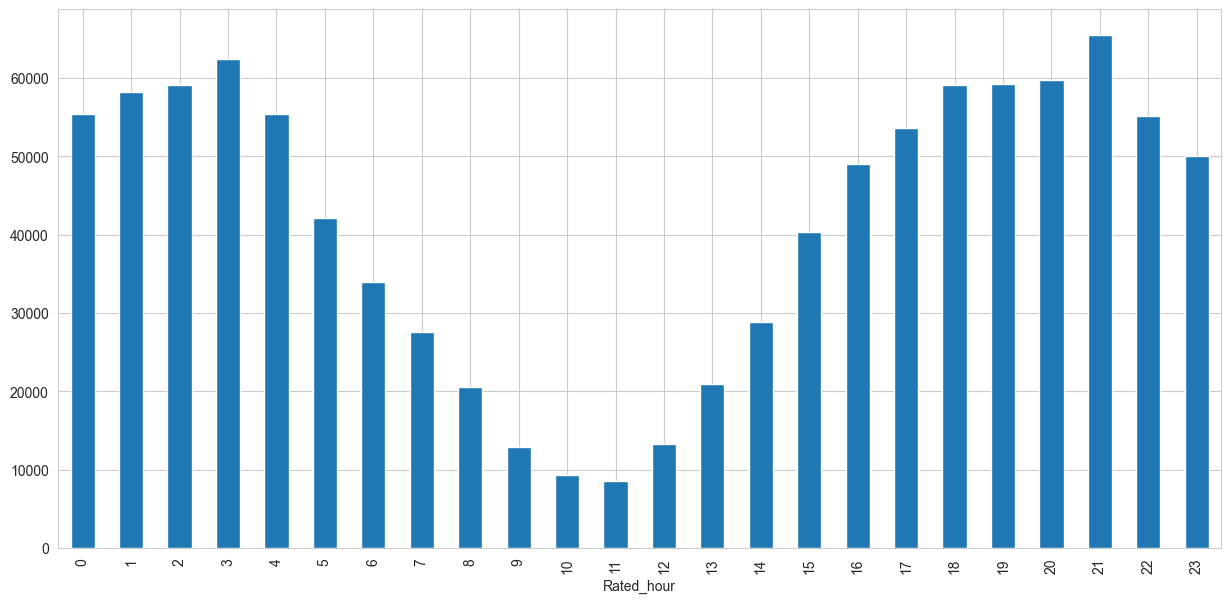

In [31]:
ratings_df['Rated_hour'].value_counts().sort_index().plot(kind='bar', figsize=(15, 7))

<Axes: xlabel='Rated_day'>

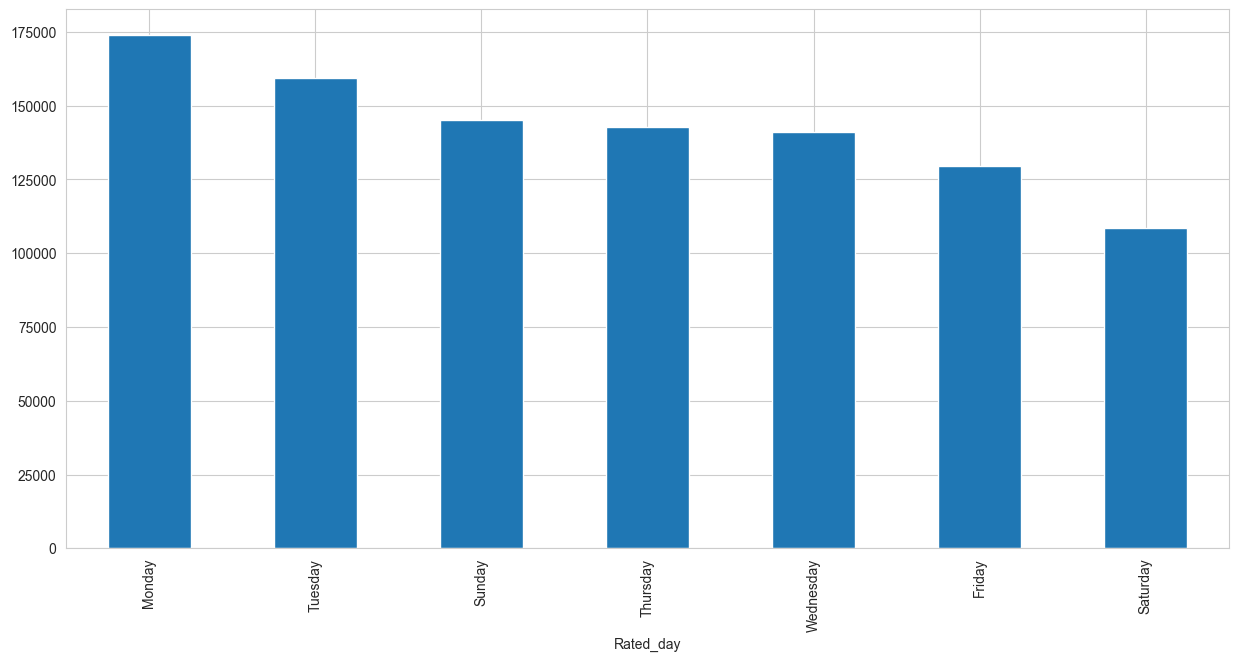

In [32]:
ratings_df['Rated_day'].value_counts().plot(kind='bar', figsize=(15, 7))

### Observations 🧐:
* The most frequent ratings are 4 stars, followed by 3 stars and 5 stars.
* Users have rated as many as 2,314 movies and as few as 20 movies.
* 50% of users have rated up to 96 movies.
* Movies have been rated by as many as 3,428 users and at least by 1 user.
* The majority of ratings have been given between 5 PM and 10 PM, followed by the period from 12 AM to 4 AM.
* Most ratings are given on Mondays, followed by Tuesdays and Sundays.

- - -

### Merging Datasets

In [33]:
df = pd.merge(ratings_df, users_df, on='UserID')
df = pd.merge(df, movies_df, left_on='MovieID', right_on='Movie ID')
df.head()

,UserID,MovieID,Rating,Timestamp,Rated_hour,Rated_day,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,2000-12-31 22:12:40,22,Sunday,0,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,2000-12-31 22:35:09,22,Sunday,0,1,10,48067,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,2000-12-31 22:32:48,22,Sunday,0,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,2000-12-31 22:04:35,22,Sunday,0,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,2001-01-06 23:38:11,23,Saturday,0,1,10,48067,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df.shape

(1000209, 33)

In [35]:
# Average rating of each movie
average_rating = df.groupby('Title')['Rating'].agg(['mean', 'count'])
average_rating.reset_index(inplace=True)
average_rating.columns = ['Title', 'Average_Rating', 'No_of_ratings']
average_rating.head()

,Title,Average_Rating,No_of_ratings
0,"$1,000,000 Duck (1971)",3.027027,37
1,'Night Mother (1986),3.371429,70
2,'Til There Was You (1997),2.692308,52
3,"'burbs, The (1989)",2.910891,303
4,...And Justice for All (1979),3.713568,199


In [36]:
movie_user_rating = df.pivot_table(index='UserID', columns='Title', values='Rating')
movie_user_rating.fillna(0, inplace=True)
movie_user_rating.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- - -

## Recommendation System

### Recommending movies based on pearson correlation

In [37]:
# Recommending movies based on correlation
correlation = movie_user_rating.corr(method='pearson', min_periods=100)
correlation

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.065338,0.030805,0.065478,0.048708,-0.001319,0.036612,0.176528,0.159973,0.075665,...,0.030758,0.060574,-0.002833,0.035056,-0.001237,0.040590,0.024165,-0.001332,0.116574,0.009243
'Night Mother (1986),0.065338,1.000000,0.107374,0.096778,0.144480,-0.001834,0.046122,0.123378,0.074706,0.083988,...,0.042061,0.065333,0.060202,0.124593,-0.001719,0.085001,0.054343,-0.001852,-0.005825,0.054699
'Til There Was You (1997),0.030805,0.107374,1.000000,0.082706,0.051965,0.079011,0.105672,0.091422,0.108952,0.054821,...,0.019685,0.043294,-0.003341,0.068935,-0.001459,0.016935,0.062262,-0.001571,0.042842,0.043483
"'burbs, The (1989)",0.065478,0.096778,0.082706,1.000000,0.110790,-0.003821,0.133881,0.198168,0.134041,0.113112,...,0.092597,0.165666,0.012226,0.114837,-0.003582,0.042862,0.121617,-0.003858,0.022249,0.062471
...And Justice for All (1979),0.048708,0.144480,0.051965,0.110790,1.000000,-0.003203,0.018614,0.151020,0.078917,0.160556,...,0.071819,0.115402,0.061253,0.088616,-0.003002,0.075720,0.075804,0.072283,-0.010171,0.071000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",0.040590,0.085001,0.016935,0.042862,0.075720,-0.001186,-0.009530,0.030622,0.003318,0.019564,...,0.040208,0.059839,0.068069,0.134474,-0.001112,1.000000,0.071585,0.124038,-0.003766,0.125207
Zero Effect (1998),0.024165,0.054343,0.062262,0.121617,0.075804,-0.003931,0.114230,0.088855,0.047345,0.070705,...,0.159991,0.124075,0.013451,0.185265,-0.003684,0.071585,1.000000,0.056690,0.004788,0.199973
Zero Kelvin (Kjærlighetens kjøtere) (1995),-0.001332,-0.001852,-0.001571,-0.003858,0.072283,-0.000322,-0.006235,0.032238,-0.004277,0.032880,...,0.046727,0.043840,-0.000690,-0.002315,-0.000301,0.124038,0.056690,1.000000,-0.001021,0.042534


In [38]:
movie_name = 'Toy Story (1995)'
similar_movies = correlation[movie_name]

similar_movies = similar_movies.sort_values(ascending=False)
similar_movies = similar_movies.dropna()
similar_movies = similar_movies.to_frame()
similar_movies = similar_movies.reset_index()
similar_movies.columns = ['Title', 'Correlation']
# similar_movies = pd.merge(similar_movies, average_rating, on='Title')
similar_movies = similar_movies[similar_movies['Title'] != movie_name]
similar_movies = similar_movies.sort_values('Correlation', ascending=False)
similar_movies = pd.merge(similar_movies, average_rating, on='Title')
similar_movies = similar_movies[similar_movies['No_of_ratings'] > 100]  
similar_movies[['Title', 'Correlation', 'Average_Rating', 'No_of_ratings']].head(5)

,Title,Correlation,Average_Rating,No_of_ratings
0,Toy Story 2 (1999),0.487370,4.218927,1585
1,Aladdin (1992),0.470753,3.788305,1351
2,"Lion King, The (1994)",0.411131,3.860839,1121
3,Groundhog Day (1993),0.407547,3.953029,2278
4,"Bug's Life, A (1998)",0.402679,3.854375,1703


- - - 

### Recommender System based on Cosine Similarity

In [39]:
# item-item similarity matrix and user-user similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

item_item_similarity = cosine_similarity(movie_user_rating.T)
item_item_similarity = pd.DataFrame(item_item_similarity, index=movie_user_rating.columns, columns=movie_user_rating.columns)
item_item_similarity


Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.072357,0.037011,0.079291,0.060838,0.000000,0.058619,0.189965,0.172254,0.094785,...,0.038725,0.076474,0.000000,0.044074,0.0,0.045280,0.039395,0.000000,0.120242,0.027003
'Night Mother (1986),0.072357,1.000000,0.115290,0.115545,0.159526,0.000000,0.076798,0.147437,0.095922,0.111413,...,0.053010,0.087828,0.063758,0.135962,0.0,0.091150,0.074787,0.000000,0.000000,0.077807
'Til There Was You (1997),0.037011,0.115290,1.000000,0.098756,0.066301,0.080250,0.127895,0.112654,0.125670,0.079115,...,0.029200,0.062893,0.000000,0.079187,0.0,0.022594,0.079261,0.000000,0.047526,0.063284
"'burbs, The (1989)",0.079291,0.115545,0.098756,1.000000,0.143620,0.000000,0.192191,0.246927,0.175885,0.170719,...,0.113386,0.207897,0.019962,0.138064,0.0,0.055704,0.161174,0.000000,0.033567,0.110525
...And Justice for All (1979),0.060838,0.159526,0.066301,0.143620,1.000000,0.000000,0.075093,0.194154,0.116379,0.205486,...,0.089998,0.153006,0.067009,0.109029,0.0,0.086080,0.110867,0.074317,0.000000,0.111040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",0.045280,0.091150,0.022594,0.055704,0.086080,0.000000,0.012702,0.048761,0.018537,0.039344,...,0.047282,0.073996,0.070409,0.141537,0.0,1.000000,0.084020,0.124939,0.000000,0.137372
Zero Effect (1998),0.039395,0.074787,0.079261,0.161174,0.110867,0.000000,0.175771,0.146381,0.094669,0.133061,...,0.179315,0.169677,0.021362,0.206870,0.0,0.084020,1.000000,0.059228,0.016838,0.242043
Zero Kelvin (Kjærlighetens kjøtere) (1995),0.000000,0.000000,0.000000,0.000000,0.074317,0.000000,0.000000,0.036113,0.000000,0.036867,...,0.048440,0.046892,0.000000,0.000000,0.0,0.124939,0.059228,1.000000,0.000000,0.045644


In [40]:
user_user_similarity = cosine_similarity(movie_user_rating)
user_user_similarity = pd.DataFrame(user_user_similarity, index=movie_user_rating.index, columns=movie_user_rating.index)
user_user_similarity

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.096382,0.120610,0.132455,0.090158,0.179222,0.059678,0.138241,0.226148,0.255288,...,0.170588,0.082006,0.069807,0.033663,0.114877,0.186329,0.135979,0.000000,0.174604,0.133590
2,0.096382,1.000000,0.151479,0.171176,0.114394,0.100865,0.305787,0.203337,0.190198,0.226861,...,0.112503,0.091222,0.268565,0.014286,0.183384,0.228241,0.206274,0.066118,0.066457,0.218276
3,0.120610,0.151479,1.000000,0.151227,0.062907,0.074603,0.138332,0.077656,0.126457,0.213655,...,0.092960,0.125864,0.161507,0.000000,0.097308,0.143264,0.107744,0.120234,0.094675,0.133144
4,0.132455,0.171176,0.151227,1.000000,0.045094,0.013529,0.130339,0.100856,0.093651,0.120738,...,0.163629,0.093041,0.382803,0.000000,0.082097,0.170583,0.127464,0.062907,0.064634,0.137968
5,0.090158,0.114394,0.062907,0.045094,1.000000,0.047449,0.126257,0.220817,0.261330,0.117052,...,0.100652,0.035732,0.061806,0.054151,0.179083,0.293365,0.172686,0.020459,0.027689,0.241437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.186329,0.228241,0.143264,0.170583,0.293365,0.093583,0.122441,0.227400,0.239607,0.338072,...,0.131294,0.209843,0.186426,0.103431,0.267405,1.000000,0.341462,0.124174,0.219115,0.411891
6037,0.135979,0.206274,0.107744,0.127464,0.172686,0.065788,0.111673,0.144395,0.225055,0.246902,...,0.142309,0.276134,0.129985,0.118749,0.141676,0.341462,1.000000,0.049015,0.252146,0.428240
6038,0.000000,0.066118,0.120234,0.062907,0.020459,0.065711,0.000000,0.019242,0.093470,0.113789,...,0.108837,0.106897,0.040689,0.000000,0.063967,0.124174,0.049015,1.000000,0.161714,0.099300


In [41]:
# Top 5 recommendations for a movie
def get_top_5_recommendations(movie_name):
    similar_movies = item_item_similarity[movie_name]
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.dropna()
    similar_movies = similar_movies.to_frame()
    similar_movies = similar_movies.reset_index()
    similar_movies.columns = ['Title', 'Similarity']
    similar_movies = similar_movies[similar_movies['Title'] != movie_name]
    similar_movies = similar_movies.head(5)
    return similar_movies

In [42]:
movie_name = 'Toy Story (1995)'
get_top_5_recommendations(movie_name)

,Title,Similarity
1,Toy Story 2 (1999),0.633104
2,Groundhog Day (1993),0.610826
3,Aladdin (1992),0.605849
4,"Bug's Life, A (1998)",0.579382
5,Back to the Future (1985),0.570125


- - - 

### Recommender System based on Matrix Factorization

In [43]:
# # Use cmfrec/Surprise library to run matrix factorization. (Show results with d=4).

# from surprise import Dataset
# from surprise import Reader
# from surprise import SVD
# from surprise.model_selection import cross_validate

# reader = Reader(rating_scale=(1, 5))
# data = Dataset.load_from_df(ratings_df[['UserID', 'MovieID', 'Rating']], reader)

# algo = SVD(n_factors=4)
# cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# from surprise.model_selection import train_test_split

# trainset, testset = train_test_split(data, test_size=0.25)
# algo.fit(trainset)
# predictions = algo.test(testset)

# from surprise import accuracy

# accuracy.rmse(predictions)
# accuracy.mae(predictions)

# # Predict rating for a user and movie
# uid = 1 # user id
# iid = 1091 # item id
# pred = algo.predict(uid, iid, verbose=True)
# pred

- - - 

### Questionnaire ❓

In [44]:
df

,UserID,MovieID,Rating,Timestamp,Rated_hour,Rated_day,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,2000-12-31 22:12:40,22,Sunday,0,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,2000-12-31 22:35:09,22,Sunday,0,1,10,48067,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,2000-12-31 22:32:48,22,Sunday,0,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,2000-12-31 22:04:35,22,Sunday,0,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,2001-01-06 23:38:11,23,Saturday,0,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,2000-04-26 02:35:41,2,Wednesday,1,25,6,11106,...,0,0,0,0,0,0,0,0,0,0
1000205,6040,1094,5,2000-04-25 23:21:27,23,Tuesday,1,25,6,11106,...,0,0,0,0,0,1,0,0,1,0
1000206,6040,562,5,2000-04-25 23:19:06,23,Tuesday,1,25,6,11106,...,0,0,0,0,0,0,0,0,0,0
1000207,6040,1096,4,2000-04-26 02:20:48,2,Wednesday,1,25,6,11106,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Users of which age group have watched and rated the most number of movies?
most_rated_movies = df.groupby('Age')['Title'].count().sort_values(ascending=False)
most_rated_movies


Age
25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Title, dtype: int64

In [46]:
# Users belonging to which profession have watched and rated the most movies?

most_rated_movies = df.groupby('Occupation')['Title'].count().sort_values(ascending=False)
most_rated_movies

Occupation
4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: Title, dtype: int64

In [47]:
# Most of the users in our dataset who’ve rated the movies are Male.

most_rated_movies = df.groupby('Gender')['Title'].count().sort_values(ascending=False)
most_rated_movies

Gender
1    753769
0    246440
Name: Title, dtype: int64

In [48]:
# Most of the movies present in our dataset were released in which decade?

most_rated_movies = movies_df.groupby('Release_Decade')['Title'].count().sort_values(ascending=False)
most_rated_movies

Release_Decade
90's    2283
80's     598
70's     247
60's     191
50's     168
00's     156
40's     126
30's      77
20's      34
10's       3
Name: Title, dtype: int64

In [49]:
# The movie with maximum number of ratings

most_rated_movies = df.groupby('Title')['Rating'].count().sort_values(ascending=False)
most_rated_movies

Title
American Beauty (1999)                                       3428
Star Wars: Episode IV - A New Hope (1977)                    2991
Star Wars: Episode V - The Empire Strikes Back (1980)        2990
Star Wars: Episode VI - Return of the Jedi (1983)            2883
Jurassic Park (1993)                                         2672
                                                             ... 
Target (1995)                                                   1
I Don't Want to Talk About It (De eso no se habla) (1993)       1
An Unforgettable Summer (1994)                                  1
Never Met Picasso (1996)                                        1
Full Speed (1996)                                               1
Name: Rating, Length: 3706, dtype: int64

In [50]:
# Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

movie_name = 'Liar Liar (1997)'
get_top_5_recommendations(movie_name)

,Title,Similarity
1,Mrs. Doubtfire (1993),0.557067
2,Ace Ventura: Pet Detective (1994),0.516861
3,Dumb & Dumber (1994),0.512585
4,Home Alone (1990),0.511204
5,Wayne's World (1992),0.499368


#### Answers:

1. Users of which age group have watched and rated the most number of movies? - **25-34**
2. Users belonging to which profession have watched and rated the most movies? - **college or graduate**
3. Most of the users in our dataset who’ve rated the movies are Male. (T/F) - **True**
4. Most of the movies present in our dataset were released in which decade? - **90s**
5. The movie with maximum number of ratings is **American Beauty (1999)** has **3428**.
6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.
    - Mrs. Doubtfire (1993)
 	- Ace Ventura: Pet Detective (1994)
	- Dumb & Dumber (1994)
7. On the basis of approach, Collaborative Filtering methods can be classified into user-based and item-based.
8. Pearson Correlation ranges between **-1** to **1** whereas, Cosine Similarity belongs to the interval between **0** to **1**.
9. Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.
10. Give the sparse ‘row’ matrix representation for the following dense matrix:
     ```
     [[1 0]
      [3 7]]
     ```
    - data = [1, 3, 7]
    - col_index = [0, 0, 1]
    - row_ptr = [0, 1, 3]


- - -